In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [4]:
df = pd.read_csv("1976-2020-senate.csv")

In [5]:
df
df_mod = df[df['stage'] == 'gen']
df_mod = df_mod[df_mod['party_simplified'].isin(['REPUBLICAN', 'DEMOCRAT'])]
grouped = df_mod.groupby(['year', 'party_simplified'])['candidatevotes'].sum().unstack().fillna(0)
grouped['Total'] = grouped.sum(axis=1)
grouped['DEMOCRAT_pct'] = 100 * grouped['DEMOCRAT'] / grouped['Total']
grouped['REPUBLICAN_pct'] = 100 * grouped['REPUBLICAN'] / grouped['Total']

In [6]:
years = grouped.index.values
t = years - years[0]
vote_A = grouped['DEMOCRAT_pct'].values
vote_B = grouped['REPUBLICAN_pct'].values

In [7]:
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [8]:
x = np.array(t)
y = vote_A

In [9]:
params, _ = curve_fit(logistic, x, y, p0=[60, 0.2, 10])
L, k, x0 = params

In [10]:
y_fit = logistic(x, L, k, x0)

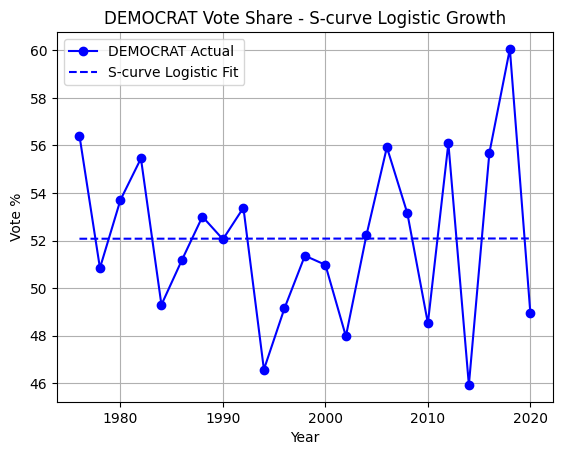

In [11]:
plt.plot(years, y, 'bo-', label="DEMOCRAT Actual")
plt.plot(years, y_fit, 'b--', label="S-curve Logistic Fit")
plt.title("DEMOCRAT Vote Share - S-curve Logistic Growth")
plt.xlabel("Year")
plt.ylabel("Vote %")
plt.grid(True)
plt.legend()
plt.show()